In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import pydotplus
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [4]:
data = pd.read_csv('my_data.csv')
data['Gender'] = data['Gender'].map({'Мужской': 1, 'Женский': 0})
data = data[['Age', 'Gender', 'BMI', 'endocrinology', 'digestive',
       'neurology', 'urinary', 'musculoskeletal', 'gynecological',
       'blood', 'lower_respiratory']]

In [5]:
data.head()

,Age,Gender,BMI,endocrinology,digestive,neurology,urinary,musculoskeletal,gynecological,blood,lower_respiratory
0,67.0,1,9.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,1,23.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,1,24.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,1,24.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50.0,1,24.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data = pd.DataFrame(data=StandardScaler().fit_transform(data), columns=data.columns)
data_for_clustering = data[:10000]

Clustering:

KMeans:

In [61]:
kmaens_score = []
number_of_clusters = []
for i in range(2, 300):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_for_clustering)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
    number_of_clusters.append(i)
    kmaens_score.append(silhouette_avg)
    print(i, cluster_labels, silhouette_avg)

2 [0 0 0 ..., 1 1 1] 0.132282900132
3 [0 0 0 ..., 2 2 0] 0.134759761173
4 [1 1 1 ..., 2 2 0] 0.168554705349
5 [2 2 2 ..., 1 1 1] 0.188607671745
6 [1 1 1 ..., 2 2 2] 0.195783923548
7 [2 2 2 ..., 3 3 4] 0.192215688331
8 [0 0 0 ..., 3 3 7] 0.205111198806
9 [4 4 4 ..., 2 2 1] 0.213254880609
10 [0 3 0 ..., 1 1 4] 0.229424193101
11 [10  2 10 ...,  1  1  0] 0.233267560273
12 [9 8 9 ..., 1 1 4] 0.245790919205
13 [ 0 10  0 ..., 12 12 11] 0.255324674696
14 [11  2 11 ...,  1  1  0] 0.265395845411
15 [ 5 14  5 ...,  1  1  7] 0.270547582725
16 [13  9 13 ...,  7  7  1] 0.269441547144
17 [12 16 12 ..., 14 14  4] 0.249849724041
18 [ 3 12  3 ..., 10 10  4] 0.285217112508
19 [ 4 17  4 ..., 15 15 11] 0.288652476333
20 [ 0  4  0 ..., 14 14  5] 0.303980405337
21 [10 15 10 ..., 20 20  2] 0.296481942243
22 [11  3 11 ...,  2  2  6] 0.303034919342
23 [14  2 14 ...,  1  1  0] 0.281747236825
24 [4 2 4 ..., 9 9 6] 0.308828779884
25 [14  2 14 ...,  1  1  0] 0.28788299882
26 [13  5 13 ...,  4  4 24] 0.310710453226


186 [184 166  36 ...,   2   2  81] 0.363417771449
187 [145  23   0 ...,  32  32 161] 0.370308601122
188 [  6 124  69 ...,   8   8 121] 0.365032383583
189 [129  49 119 ...,   2   2   6] 0.367224226493
190 [178  18  41 ..., 122 122  46] 0.366812862476
191 [ 40  14   9 ...,  34  34 109] 0.367921556626
192 [165  38 168 ...,  71  71  23] 0.369456547161
193 [ 64 160  58 ..., 183 183  20] 0.371122472825
194 [22 17 97 ..., 99 99 29] 0.374306573477
195 [109   8  25 ..., 178 178 160] 0.369317889566
196 [ 98   0 163 ..., 188 188 111] 0.371316492046
197 [ 97  47 150 ..., 186 186 113] 0.373560764912
198 [ 91  22 183 ...,  80  80  70] 0.36695180932
199 [ 54 141 192 ..., 161 161 194] 0.364921399682
200 [122 109  28 ..., 192 192   7] 0.374621759632
201 [121  31 196 ...,  69  69  54] 0.375451650698
202 [189   7  51 ...,  95  95 126] 0.373792489165
203 [ 89 170 182 ...,  12  12  23] 0.372193147389
204 [96 12  3 ..., 17 17 88] 0.36169602866
205 [117 180  74 ..., 156 156 120] 0.37019383727
206 [ 45  71  7

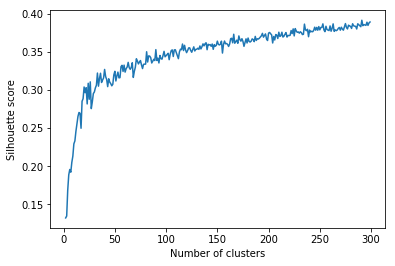

In [62]:
plt.plot(number_of_clusters, kmaens_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

Hierarchical:

In [45]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

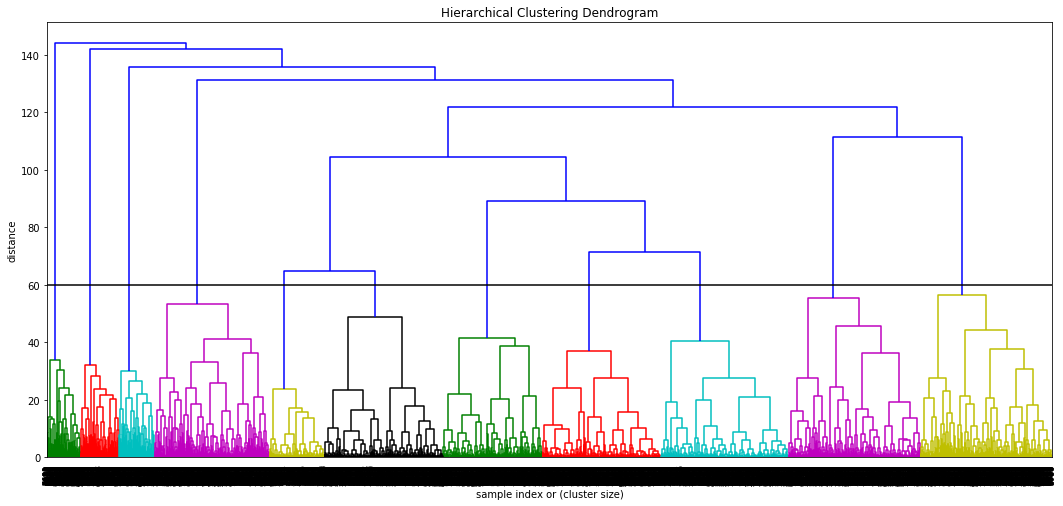

In [48]:
# data = data[:10000]
# dn = hierarchy.dendrogram(Z, color_threshold=0.5)

Z = linkage(data_for_clustering, 'ward')
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    max_d = 60,
    show_leaf_counts=False,
)
plt.show()

DBSCAN:

In [66]:
db = DBSCAN(eps=0.3, min_samples=5).fit(data_for_clustering)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
silhouette_score(data_for_clustering, labels)

0.50504866588196595

In [67]:
len(set(labels)) - (1 if -1 in labels else 0)

139

In [85]:
indexes = []
for i in range(len(labels)):
    if labels[i] == 1:
        indexes.append(i)

In [86]:
data.iloc[indexes].head()

,Age,BMI,endocrinology,digestive,neurology,urinary,musculoskeletal,gynecological,blood,lower_respiratory
3,50.0,24.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,54.0,32.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1201,59.0,22.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1388,52.0,28.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1762,51.0,21.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Classification:

In [42]:
def to_binary(v):
    if -0.74 < v < -0.73:
        return 0
    else:
        return 1

In [61]:
data['Gender'] = data['Gender'].apply(to_binary)
y = data['Gender']
data.drop('Gender', axis=1, inplace=True)

In [96]:
# y.value_counts()

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(data.values, y.values, test_size=.3, random_state=14)

Logistic Regression:

In [82]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.70210273170130111

Random forest:

In [88]:
tree_params = {'max_depth': list(range(1, 50))}

tree_grid = GridSearchCV(RandomForestClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

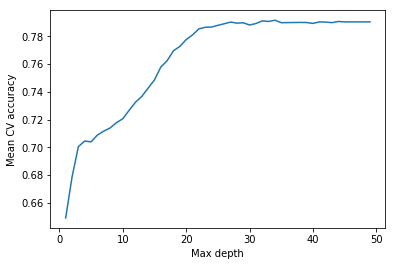

In [89]:
plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [90]:
print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 34}
Best cross validaton score 0.791473954066


In [91]:
tuned_tree_acc_valid = accuracy_score(y_valid, tree_grid.predict(X_valid))
tuned_tree_acc_valid

0.81056915582413513

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, tree_grid.predict(X_valid)))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86     10608
          1       0.75      0.67      0.71      5609

avg / total       0.81      0.81      0.81     16217



Naive Bayes classifier:

In [65]:
nb = BernoulliNB() # MultinomialNB
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_valid)
print(accuracy_score(y_valid, y_pred_class))

0.67330579022


KNN:

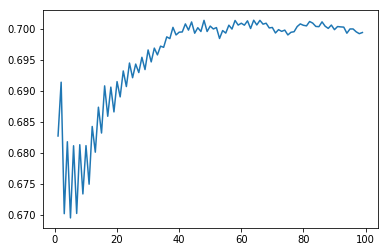

In [50]:
cv_scores = []
n_neighb = [i for i in range(1, 100)]

for k in n_neighb:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, data, y, cv=5, scoring='accuracy')))
    knn.fit(X_train, y_train)
plt.plot(n_neighb, cv_scores, label='CV');

In [52]:
max_i = 0
max_v = cv_scores[max_i]

for i in range(len(cv_scores)):
    if cv_scores[i] > max_v:
        max_v = cv_scores[i]
        max_i = i
max_v, max_i

(0.70133569716183985, 63)